# Report 2 -- NBA Role Player data analysis

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import warnings
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import sys
from pandas import Series, DataFrame
from scipy.stats import norm

# read salary data

In [22]:
salary = pd.read_csv("salary18.csv")
salary_a = salary.sort_values(by = "season17_18", ascending = True)
salary_a.head()

,Unnamed: 0,Player,Tm,season17_18
572,573,Jarell Eddie,CHI,17224.0
571,572,Joel Bolomboy,MIL,22248.0
569,570,Chris Johnson,HOU,25000.0
567,568,Axel Toupane,NOP,25000.0
570,571,Beno Udrih,DET,25000.0


# find role player

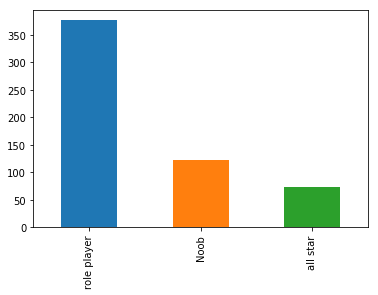

In [64]:
bins = [10000, 1000000, 15000000, 50000000]
a = pd.cut(salary_a["season17_18"], bins = bins, labels = ["Noob","role player","all star"])
a.value_counts().plot(kind = "bar")


# read NBA player stats 

In [2]:
# Because some players are traded like row 22,23,24. So that we need to delete these repeated names and then merge these two datasets.

In [24]:
stats = pd.read_csv("nbastat.csv")
stats.head(30)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,32.7,5.9,9.4,...,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,19.8,2.5,4.9,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4
5,6,Cole Aldrich\aldrico01,C,29,MIN,21,0,2.3,0.2,0.7,...,0.333,0.1,0.6,0.7,0.1,0.1,0.0,0.0,0.5,0.6
6,7,LaMarcus Aldridge\aldrila01,C,32,SAS,75,75,33.5,9.2,18.0,...,0.837,3.3,5.2,8.5,2.0,0.6,1.2,1.5,2.1,23.1
7,8,Jarrett Allen\allenja01,C,19,BRK,72,31,20.0,3.3,5.5,...,0.776,2.0,3.4,5.4,0.7,0.4,1.2,1.1,2.0,8.2
8,9,Kadeem Allen\allenka01,PG,25,BOS,18,1,5.9,0.3,1.2,...,0.778,0.2,0.4,0.6,0.7,0.2,0.1,0.5,0.8,1.1
9,10,Tony Allen\allento01,SF,36,NOP,22,0,12.4,2.0,4.1,...,0.524,0.9,1.2,2.1,0.4,0.5,0.1,0.9,2.2,4.7


In [25]:
l1 = list(stats["Player"])
statname = []


# delete repeated names

In [26]:
for each in l1:
    statname.append(each.split(sep = "\\")[0])

In [27]:
stats["Name"] = statname

In [28]:
repeats = []
test = stats
for i in range (1,664):
    if test.iloc[i,0] == test.iloc[i-1,0]:
        #print(i)
        repeats.append(i)

In [29]:
new = stats.drop(index = repeats)

In [30]:
salary_a.head()

,Unnamed: 0,Player,Tm,season17_18
572,573,Jarell Eddie,CHI,17224.0
571,572,Joel Bolomboy,MIL,22248.0
569,570,Chris Johnson,HOU,25000.0
567,568,Axel Toupane,NOP,25000.0
570,571,Beno Udrih,DET,25000.0


In [31]:
salary_a["Name"] = salary_a["Player"]

In [32]:
salary_a.head()

,Unnamed: 0,Player,Tm,season17_18,Name
572,573,Jarell Eddie,CHI,17224.0,Jarell Eddie
571,572,Joel Bolomboy,MIL,22248.0,Joel Bolomboy
569,570,Chris Johnson,HOU,25000.0,Chris Johnson
567,568,Axel Toupane,NOP,25000.0,Axel Toupane
570,571,Beno Udrih,DET,25000.0,Beno Udrih


In [33]:
salary_1 = salary_a.drop(['Player'],axis = 1)

# merge salary and stats by player's name

In [34]:
salary_2 = salary_1.rename(columns = {"Tm":"team"})


In [35]:
result = pd.merge(salary_2, new, how='inner', on=['Name'])
result.head()

,Unnamed: 0,team,season17_18,Name,Rk,Player,Pos,Age,Tm,G,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,573,CHI,17224.0,Jarell Eddie,144,Jarell Eddie\eddieja01,SF,26,TOT,3,...,NaN,0.0,0.3,0.3,0.0,0.3,0.0,0.0,0.0,0.0
1,527,CHI,83129.0,Jarell Eddie,144,Jarell Eddie\eddieja01,SF,26,TOT,3,...,NaN,0.0,0.3,0.3,0.0,0.3,0.0,0.0,0.0,0.0
2,526,BOS,83129.0,Jarell Eddie,144,Jarell Eddie\eddieja01,SF,26,TOT,3,...,NaN,0.0,0.3,0.3,0.0,0.3,0.0,0.0,0.0,0.0
3,572,MIL,22248.0,Joel Bolomboy,57,Joel Bolomboy\bolomjo01,PF,24,MIL,6,...,0.5,1.0,0.7,1.7,0.0,0.3,0.0,0.3,0.5,1.5
4,417,UTA,1312611.0,Joel Bolomboy,57,Joel Bolomboy\bolomjo01,PF,24,MIL,6,...,0.5,1.0,0.7,1.7,0.0,0.3,0.0,0.3,0.5,1.5


In [36]:
repeats2 = []

for i in range (0,513):
    if result.iloc[i,3] == result.iloc[i+1,3]:
        #print(i,result.iloc[i,3])
        repeats2.append(i)

In [37]:
result_v = result.drop(index = repeats2)

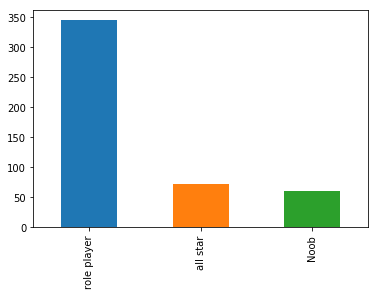

In [38]:
bins2 = [10000, 1000000, 15000000, 50000000]
temp = pd.cut(result_v["season17_18"], bins = bins2, labels = ["Noob","role player","all star"])
temp.value_counts().plot(kind = "bar")

In [ ]:
# Double check the distribution, because these two dataset come from different website some players' name are missed. In our case, about 20 rows are missed
#compare it to the whole number 500, we can still run the analysis

# Keep role players only

In [39]:
df3 = result_v.sort_values(by =  "season17_18", ascending = True)

In [40]:
df3 = df3.reset_index(drop=True)

In [41]:
t = []
for i in range (0,477):
    if (df3.iloc[i,2] < 1000000) or (df3.iloc[i,2]> 15000000):
        #print (i)
        t.append(i)
        

In [42]:
df4 = df3.drop(index = t)

In [43]:
df4 = df4.reset_index(drop = True)
df4.head()

,Unnamed: 0,team,season17_18,Name,Rk,Player,Pos,Age,Tm,G,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,450,ORL,1050000.0,Wesley Iwundu,241,Wesley Iwundu\iwundwe01,SF,23,ORL,62,...,0.723,0.6,1.6,2.2,0.9,0.5,0.2,0.5,1.3,3.7
1,449,PHO,1069308.0,Isaiah Canaan,84,Isaiah Canaan\canaais01,PG-SG,26,TOT,20,...,0.902,0.3,2.0,2.3,3.8,0.8,0.1,1.5,1.8,8.6
2,447,NYK,1100000.0,Damyean Dotson,135,Damyean Dotson\dotsoda01,SG,23,NYK,44,...,0.696,0.2,1.7,1.9,0.7,0.3,0.0,0.4,0.8,4.1
3,446,BOS,1167333.0,Abdel Nader,363,Abdel Nader\naderab01,SF,24,BOS,48,...,0.590,0.3,1.2,1.5,0.5,0.3,0.2,0.7,0.9,3.0
4,445,SAC,1184385.0,Frank Mason,316,Frank Mason\masonfr01,PG,23,SAC,52,...,0.817,0.6,1.9,2.5,2.8,0.7,0.2,1.3,1.4,7.9


# efficiency = ((Points + Rebounds + Assists + Steals + Blocks) - ((Field Goals Att. - Field Goals Made) + (Free Throws Att. - Free Throws Made) + Turnovers)).  [NBA.com]

In [44]:
effi = df4["PS/G"]+df4["TRB"]+df4["AST"]+df4["STL"]+df4["BLK"]-df4["FGA"]+df4["FG"]-df4["FTA"]+df4["FT"]-df4["TOV"]

In [45]:
df4["efficiency"] = effi

In [46]:
df5 = df4.rename(columns = {"season17_18":"salary"})

# dataset after cleaning

In [47]:
df5.head()

,Unnamed: 0,team,salary,Name,Rk,Player,Pos,Age,Tm,G,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,efficiency
0,450,ORL,1050000.0,Wesley Iwundu,241,Wesley Iwundu\iwundwe01,SF,23,ORL,62,...,0.6,1.6,2.2,0.9,0.5,0.2,0.5,1.3,3.7,4.7
1,449,PHO,1069308.0,Isaiah Canaan,84,Isaiah Canaan\canaais01,PG-SG,26,TOT,20,...,0.3,2.0,2.3,3.8,0.8,0.1,1.5,1.8,8.6,9.5
2,447,NYK,1100000.0,Damyean Dotson,135,Damyean Dotson\dotsoda01,SG,23,NYK,44,...,0.2,1.7,1.9,0.7,0.3,0.0,0.4,0.8,4.1,4.4
3,446,BOS,1167333.0,Abdel Nader,363,Abdel Nader\naderab01,SF,24,BOS,48,...,0.3,1.2,1.5,0.5,0.3,0.2,0.7,0.9,3.0,2.4
4,445,SAC,1184385.0,Frank Mason,316,Frank Mason\masonfr01,PG,23,SAC,52,...,0.6,1.9,2.5,2.8,0.7,0.2,1.3,1.4,7.9,7.9


# test if there is a linear relationship between effiency and salary

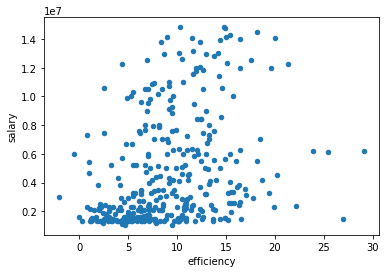

In [48]:
# a scatterplot 

df5.plot.scatter('efficiency', 'salary')

C:\Users\59381\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


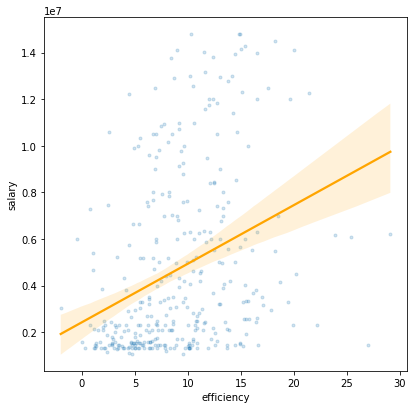

In [49]:
plt.subplots(figsize=(6.5, 6.5))
sns.regplot('efficiency', 'salary', data=df5, marker='.',
            scatter_kws={'alpha':'0.2'}, line_kws={'color':'orange'}, truncate=True)

# how to increase efficiency

C:\Users\59381\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


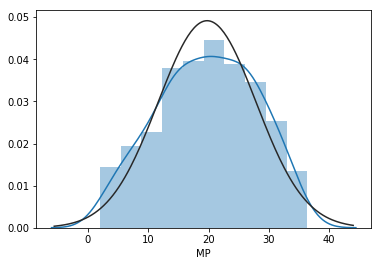

In [50]:
bin4 = [0,5,10,15,20,25,30,35,40]

b = pd.cut(df5["MP"], bins = bin4)
#b.value_counts().plot(kind = "bar")
sns.distplot(df5["MP"], fit = norm)

In [51]:
df5["mins"] = b
df5.head()

,Unnamed: 0,team,salary,Name,Rk,Player,Pos,Age,Tm,G,...,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,efficiency,mins
0,450,ORL,1050000.0,Wesley Iwundu,241,Wesley Iwundu\iwundwe01,SF,23,ORL,62,...,1.6,2.2,0.9,0.5,0.2,0.5,1.3,3.7,4.7,"(15, 20]"
1,449,PHO,1069308.0,Isaiah Canaan,84,Isaiah Canaan\canaais01,PG-SG,26,TOT,20,...,2.0,2.3,3.8,0.8,0.1,1.5,1.8,8.6,9.5,"(20, 25]"
2,447,NYK,1100000.0,Damyean Dotson,135,Damyean Dotson\dotsoda01,SG,23,NYK,44,...,1.7,1.9,0.7,0.3,0.0,0.4,0.8,4.1,4.4,"(10, 15]"
3,446,BOS,1167333.0,Abdel Nader,363,Abdel Nader\naderab01,SF,24,BOS,48,...,1.2,1.5,0.5,0.3,0.2,0.7,0.9,3.0,2.4,"(10, 15]"
4,445,SAC,1184385.0,Frank Mason,316,Frank Mason\masonfr01,PG,23,SAC,52,...,1.9,2.5,2.8,0.7,0.2,1.3,1.4,7.9,7.9,"(15, 20]"


In [52]:
bin5 = [0,10,20,30,40,50,60,70,80]

C:\Users\59381\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


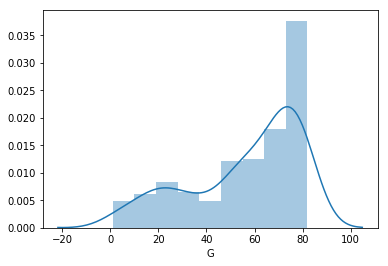

In [53]:
c = pd.cut(df5["G"], bins = bin5)
#c.value_counts().plot(kind = "bar")
sns.distplot(df5["G"])

In [54]:
df5["games"] = c
df5.head()

,Unnamed: 0,team,salary,Name,Rk,Player,Pos,Age,Tm,G,...,TRB,AST,STL,BLK,TOV,PF,PS/G,efficiency,mins,games
0,450,ORL,1050000.0,Wesley Iwundu,241,Wesley Iwundu\iwundwe01,SF,23,ORL,62,...,2.2,0.9,0.5,0.2,0.5,1.3,3.7,4.7,"(15, 20]","(60, 70]"
1,449,PHO,1069308.0,Isaiah Canaan,84,Isaiah Canaan\canaais01,PG-SG,26,TOT,20,...,2.3,3.8,0.8,0.1,1.5,1.8,8.6,9.5,"(20, 25]","(10, 20]"
2,447,NYK,1100000.0,Damyean Dotson,135,Damyean Dotson\dotsoda01,SG,23,NYK,44,...,1.9,0.7,0.3,0.0,0.4,0.8,4.1,4.4,"(10, 15]","(40, 50]"
3,446,BOS,1167333.0,Abdel Nader,363,Abdel Nader\naderab01,SF,24,BOS,48,...,1.5,0.5,0.3,0.2,0.7,0.9,3.0,2.4,"(10, 15]","(40, 50]"
4,445,SAC,1184385.0,Frank Mason,316,Frank Mason\masonfr01,PG,23,SAC,52,...,2.5,2.8,0.7,0.2,1.3,1.4,7.9,7.9,"(15, 20]","(50, 60]"


In [55]:
df6 = df5.drop(['Unnamed: 0', 'team', 'Name', 'Rk', 'Player','Pos', 'Tm', 'mins', 'games', 'salary'], axis=1)
df6.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,efficiency
0,23,62,12,16.5,1.5,3.5,0.427,0.1,0.7,0.196,...,0.6,1.6,2.2,0.9,0.5,0.2,0.5,1.3,3.7,4.7
1,26,20,1,21.1,2.6,6.9,0.380,1.1,3.3,0.333,...,0.3,2.0,2.3,3.8,0.8,0.1,1.5,1.8,8.6,9.5
2,23,44,2,10.8,1.6,3.7,0.447,0.5,1.5,0.324,...,0.2,1.7,1.9,0.7,0.3,0.0,0.4,0.8,4.1,4.4
3,24,48,1,10.9,1.0,3.1,0.336,0.5,1.4,0.354,...,0.3,1.2,1.5,0.5,0.3,0.2,0.7,0.9,3.0,2.4
4,23,52,2,18.9,2.8,7.3,0.379,0.6,1.7,0.360,...,0.6,1.9,2.5,2.8,0.7,0.2,1.3,1.4,7.9,7.9


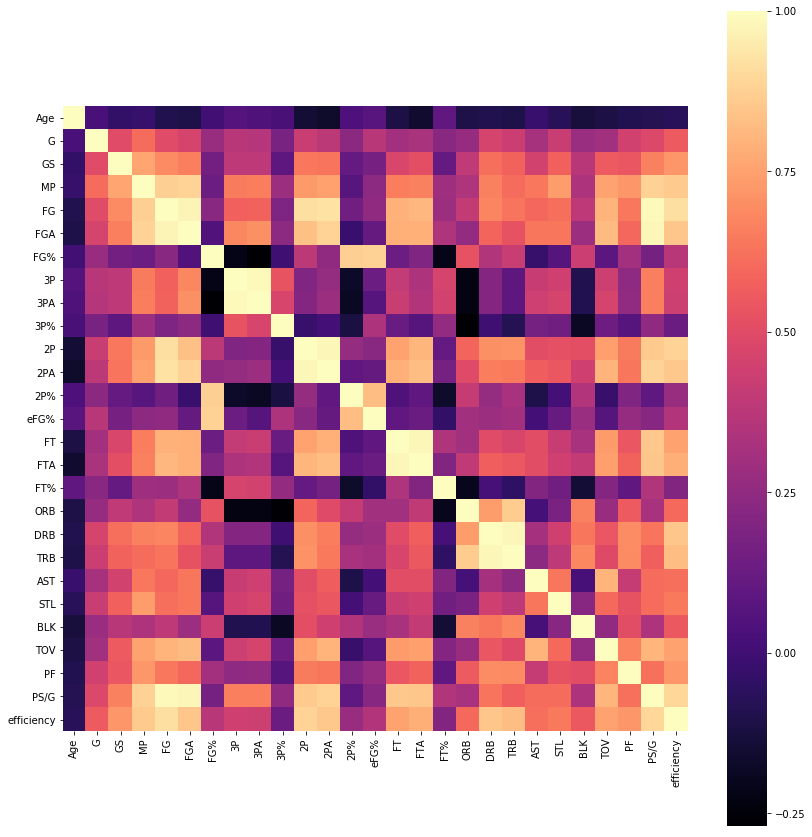

In [56]:
plt.subplots(figsize=(14,15))
corrmat = df6.corr()
sns.heatmap(corrmat, square = True, fmt = '.2f', cmap= "magma")
plt.show()

# Key factors related to efficiency. FG, MP, 2P, DRB, PS/G


# linear relationship FGA vs efficiency

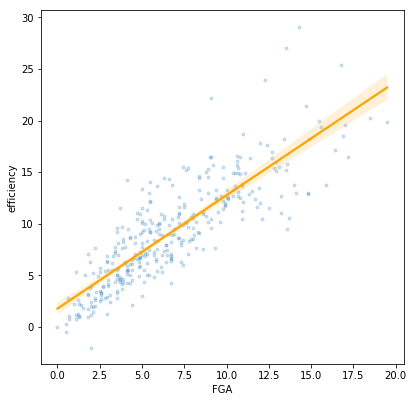

In [57]:
plt.subplots(figsize=(6.5, 6.5))
sns.regplot('FGA', 'efficiency', data=df5, marker='.',
            scatter_kws={'alpha':'0.2'}, line_kws={'color':'orange'}, truncate=True)

# Heatmap: FGA vs Mins and Games

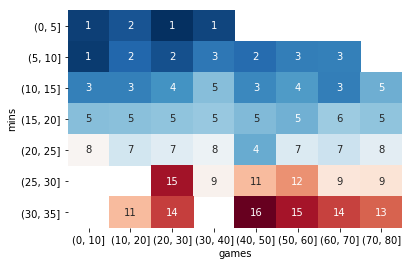

In [58]:
sns.heatmap(df5.groupby(['mins', 'games'])['FGA'].mean().unstack(),
            annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

# over 20 mins FGA significantly increases

Also, from the Heat map FGA vs. Time and number of games. We found that after 20mins, FGA is significantly increasing. so my analysis turn to how to get stable playing time during the regular season. I check the MP column in the correlation map, but there is no block's color close to white. Because it does not contain the text information. I found that it may have relationship with the position. 

# Minutes vs Positions

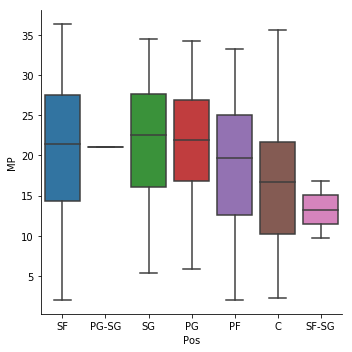

In [59]:
sns.catplot(x="Pos", y="MP", kind="box", data=df5)

In [ ]:
Through the boxplot, we found that SG, PG (shooting guard and point guard) tend to get over 20 mins playing time. and PG has highest lower limit. 
PF and C are not recommended to get more playing time. 

In [60]:

df7 = pd.DataFrame(columns=['MP'])
df7["position"] = df5["Pos"]
df7["MP"] = df5["MP"]
df7.head()

,MP,position
0,16.5,SF
1,21.1,PG-SG
2,10.8,SG
3,10.9,SF
4,18.9,PG


In [61]:
t2 = []
for i in range (0,345):
    if (df7.iloc[i, 0]<25):
        #print (i)
        t2.append(i)
df8 = df7.drop(index = t2)

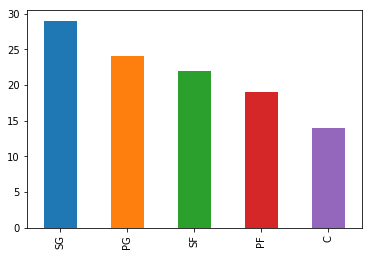

In [62]:
df8["position"].value_counts().plot(kind = "bar")

Combine this bar chart with the box plot, more rookies or bench players should exercise their SG and PG skills to get more playing time. Right now the small ball playing style is very popular in the league, which also shows from the results.  

The main idea of this analysis is through the stats data of NBA Role Players (Middle class) to see if there is a way to help them or how they should play during the game to increase their salary.

First I have to admit it is much harder than what I have imagined to analyze role player's data, I set player's salary range between 1000000 and 15000000 as role players. Because a normal NBA players should have a guaranteed contract which is at least 1 million. And there are many factors which might cause outliers. I would pay much more attention on Player's position, age, etc. in the next step.

For the result, I found there's vague linear relationship between player's efficiency with the salary. The efficiency formula is simple one fetched from NBA reference.com. So my goal turns to how to increase the efficiency through the playing style. After many attempts, I found there's clear linear relationship between efficiency and field goal attempts(FGA). And through the heatmap (FGA vs # of Games and Mins per Game), players who have more Mins playing and play 40 to 50 out of whole 80 games will own the most Field Goal Attempts. The time and games are possibly related to the strength of team or other factors, which I would like to step further during the remaining time.